# Linear Regression to Predict Car Selling Price
Melakukan prediksi harga penjualan mobil dengan menggunakan regresi linear. <br>
Dataset yang digunakan berasal dari https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Load the dataset

In [2]:
df = pd.read_csv('data/car_data.csv')

## Get some information from the data

In [3]:
# cuplikan datanya
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# tipe masing masing atribut di data nya
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
# melihat beberapa informasi dari datanya
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# melihat jumlah unique value untuk tiap data nya
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

## Divide the data into X and Y
Asumsikan kita akan memprediksi "Selling Price" sehingga variabel Y nya adalah selling price

In [7]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

In [8]:
# cek pastikan X nya benar
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
# cek pastikan Y nya benar
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## Split the data
Melakukan splitting data dengan menggunakan train_test_split dari sklearn. Membagi datanya menjadi 80% data train dan 20% data test

In [10]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

## Categorical variable encoding
Melakukan encoding untuk categorical variables, dengan alasan sebagai berikut
1. Linear regression hanya dapat menerima tipe data numeric (contoh: float/int)
2. Berdasarkan percobaan terhadap dataset ini, hasil setelah encoding lebih baik, daripada hanya di drop saja

Metode encoding yang dipilih adalah "Target Encoding", yaitu mengganti nilai variablenya dengan mean dari variabel targetnya. <br>Pemilihan metode ini didasarkan alasan sebagai berikut
1. Berdasarkan hasil percobaan, memberikan hasil yang cukup baik (dibandingkan dengan label encoding)
2. Mudah untuk divisualisasikan (jika dibandingkan dengan one-hot encoding), karena target encoding tidak membuat kolom baru seperti One hot encoding

In [11]:
# target encoding
import category_encoders as ce 
ce_target = ce.TargetEncoder(cols = ['Car_Name','Fuel_Type','Seller_Type','Transmission'])
ce_target.fit(X_train, y_train)
X_train = ce_target.transform(X_train)
X_test = ce_target.transform(X_test)


In [12]:
# mengecek hasil dari target encodingnya
X_train

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
189,4.671208,2005,0.57,55000,3.338698,0.75321,3.979078,0
263,5.709670,2016,7.70,16002,3.338698,6.66717,3.979078,0
279,7.850000,2014,13.60,40126,3.338698,6.66717,3.979078,0
212,10.950227,2016,13.60,22671,3.338698,6.66717,3.979078,0
284,4.738866,2013,5.90,9800,3.338698,6.66717,3.979078,0
...,...,...,...,...,...,...,...,...
65,3.889171,2014,6.95,45000,10.301304,6.66717,3.979078,0
125,1.932511,2009,1.75,40000,3.338698,0.75321,3.979078,0
251,7.850000,2013,9.90,56701,3.338698,6.66717,3.979078,0
56,4.637848,2015,7.27,40534,3.338698,6.66717,3.979078,0


In [13]:
# mengecek hasil dari target encodingnya
X_test

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
39,3.363943,2003,7.98,62000,3.338698,6.66717,3.979078,0
38,2.567250,2016,3.76,10079,3.338698,6.66717,3.979078,0
183,4.671208,2013,0.47,21000,3.338698,0.75321,3.979078,0
13,6.149883,2015,7.71,26000,3.338698,6.66717,3.979078,0
90,7.485723,2009,18.61,62000,3.338698,6.66717,3.979078,0
...,...,...,...,...,...,...,...,...
95,7.485723,2012,18.61,72000,3.338698,6.66717,3.979078,0
72,7.485723,2013,18.61,56001,3.338698,6.66717,3.979078,0
131,4.671208,2015,0.82,18000,3.338698,0.75321,3.979078,0
106,4.671208,2014,3.45,16500,3.338698,0.75321,3.979078,1


## Train the linear regression model
model regresi linear nya menggunakan class MyLinearRegression yang diimplementasikan sendiri dan terletak di file "mylib.py"

In [14]:
from mylib import MyLinearRegression

myLinReg = MyLinearRegression()
myLinReg.fit(X_train,y_train)
theta = myLinReg.getTheta()
pred = myLinReg.predict(X_train)
pred

189   -2.792467
263    6.027483
279    7.956095
212    9.934684
284    3.798735
         ...   
65     5.234701
125   -1.418176
251    5.989007
56     4.909812
126    1.924561
Length: 240, dtype: float64

## Scoring hasilnya dengan menggunakan Mean Squared Error<br>  
$${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$$

Lakukan scoring di train dataset

In [15]:
def mse(y, pred):
    m = len(y)
    score = np.sum((pred - y) ** 2)/float(m)
    return score

print(f'mse score on train dataset: {mse(y_train, pred)}')

mse score on train dataset: 2.518309637818889


## Visualization
Memvisualisasikan regresi untuk tiap variabel X secara independent pada train dataset. <br>
Garis nya adalah hasil regresi nya <br>
Sedangkan, titik-titik nya adalah scatter plot X-Y nya

In [16]:
def drawRegressionResult(X, y):
    for col in X.columns:
        myLinReg = MyLinearRegression()
        myLinReg.fit(X_train[[col]],y_train)
        predThisX = myLinReg.predict(X[[col]])
        plt.title(col)
        plt.plot(X[col], y, "b.")
        plt.plot(X[col], predThisX, "r-")
        plt.show()

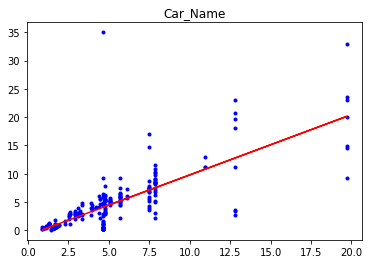

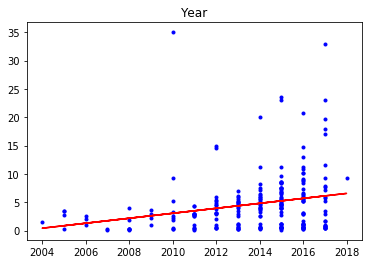

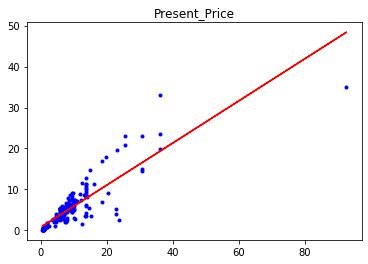

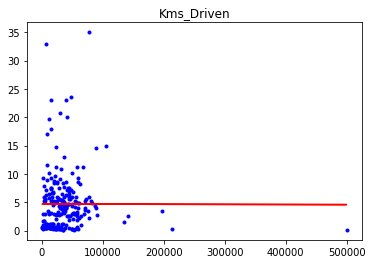

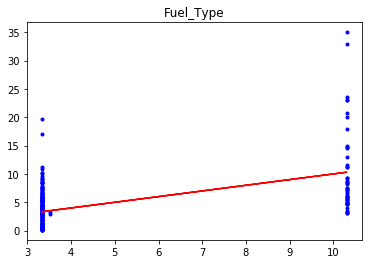

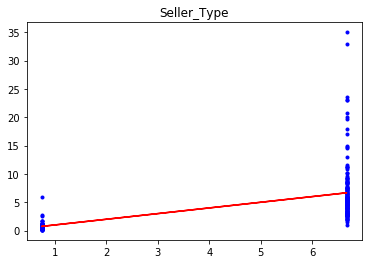

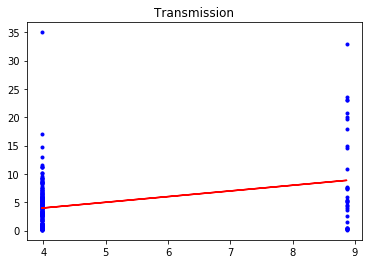

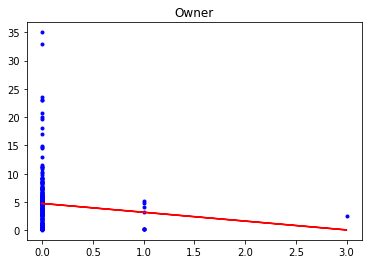

In [17]:
drawRegressionResult(X_train, y_train)

## Prediction
Melakukan prediksi di test dataset

In [18]:
pred = myLinReg.predict(X_test)

print(f'mse score on test dataset: {mse(y_test, pred)}')

mse score on test dataset: 3.131809959991437


## Visualization on test dataset

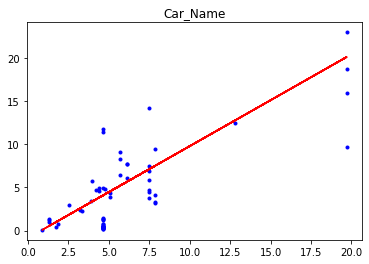

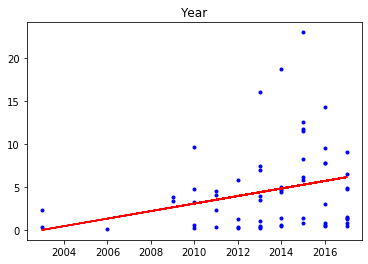

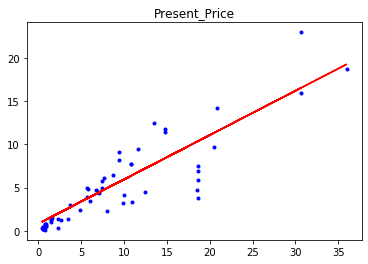

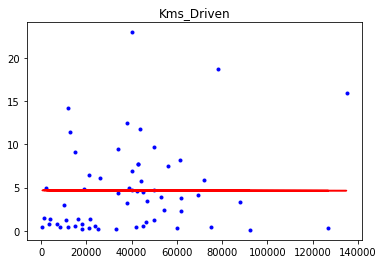

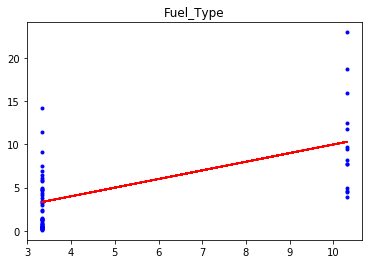

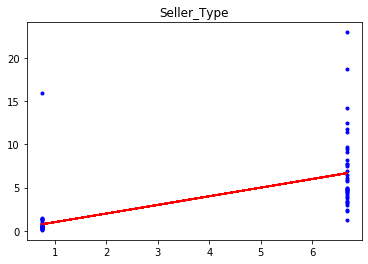

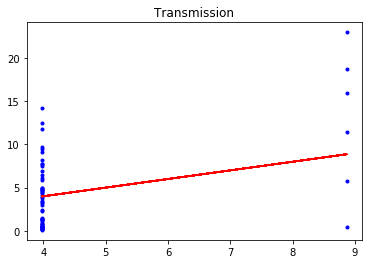

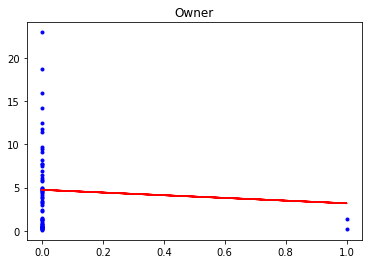

In [19]:
drawRegressionResult(X_test, y_test)

## Comparison with scikit-learn linear regression
Membandingkan hasil regresi yang didapat dari model linear regression yang dibuat sendiri, dan yang dari scikit-learn

In [20]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# MSE on training data
from math import sqrt
from sklearn.metrics import mean_squared_error
mse_score = (mean_squared_error(y_train, linreg.predict(X_train)))
print(f'mse score on train dataset: {mse_score}')

# prediction
pred = linreg.predict(X_test)

# MSE on test data
mse_score_test = (mean_squared_error(y_test, pred))
print(f'mse score on test dataset: {mse_score_test}')

mse score on train dataset: 2.5183096378189194
mse score on test dataset: 3.131809958232135


## Conclusion
Hasil yang didapat dari linear regression yang dibuat sendiri, dan yang dari scikit-learn nilai MSE nya sama persis. 